In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import numpy as np
import glob

In [2]:
base_folder = os.path.join(os.getcwd(), 'seg_res_evaluation_csv')
gmm_3d_3 = pd.read_csv(os.path.join(base_folder, 'gmm_3d_3.csv'))
gmm_3d_4 = pd.read_csv(os.path.join(base_folder, 'gmm_3d_4.csv'))
gmm_3d_6 = pd.read_csv(os.path.join(base_folder, 'gmm_3d_6.csv'))
gmm_4d_3 = pd.read_csv(os.path.join(base_folder, 'gmm_4d_3.csv'))
gmm_4d_4 = pd.read_csv(os.path.join(base_folder, 'gmm_4d_4.csv'))
gmm_4d_6 = pd.read_csv(os.path.join(base_folder, 'gmm_4d_6.csv'))
kmeans_3d_3 = pd.read_csv(os.path.join(base_folder, 'k-means_3d_3.csv'))
kmeans_3d_4 = pd.read_csv(os.path.join(base_folder, 'k-means_3d_4.csv'))
kmeans_3d_6 = pd.read_csv(os.path.join(base_folder, 'k-means_3d_6.csv'))
kmeans_4d_3 = pd.read_csv(os.path.join(base_folder, 'k-means_4d_3.csv'))
kmeans_4d_4 = pd.read_csv(os.path.join(base_folder, 'k-means_4d_4.csv'))
kmeans_4d_6 = pd.read_csv(os.path.join(base_folder, 'k-means_4d_6.csv'))

In [15]:
gmm_3d_3

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
0,400,0,0.041972,0.243138,0.071587,0.519521,0.227388,0.316324,0.000000,0.000000,0.000000,0.368441,0.662572,0.473551
1,400,1,0.400835,0.736695,0.519183,0.118218,0.016416,0.028829,0.000033,1.000000,0.000066,0.466956,0.266423,0.339273
2,400,2,0.001902,0.020168,0.003476,0.943978,0.756196,0.839717,0.000000,0.000000,0.000000,0.021573,0.071006,0.033092
3,401,0,0.041348,0.241667,0.070614,0.516970,0.226497,0.314990,0.000000,0.000000,0.000000,0.383010,0.661376,0.485095
4,401,1,0.397449,0.737761,0.516596,0.120318,0.016742,0.029393,0.000017,1.000000,0.000033,0.472144,0.258931,0.334446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,799,1,0.591358,0.529947,0.558971,0.069008,0.005328,0.009893,0.000772,0.870968,0.001543,0.328967,0.113556,0.168833
1199,799,2,0.003414,0.036264,0.006240,0.975480,0.892763,0.932290,0.000000,0.000000,0.000000,0.014305,0.058530,0.022991
1200,800,0,0.111729,0.436199,0.177892,0.303289,0.101670,0.152289,0.000007,0.166667,0.000013,0.559523,0.834654,0.669941
1201,800,1,0.590597,0.527303,0.557158,0.070013,0.005367,0.009970,0.000145,0.833333,0.000289,0.325618,0.111083,0.165654


In [7]:
gmm_3d_3.loc[(gmm_3d_3['slice'] < 500) & (gmm_3d_3['current_cluster'] == 1)].describe()

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,449.500000,1.0,0.415950,0.702313,0.522221,0.104311,0.013899,0.024511,0.028558,0.925645,0.054315,0.435385,0.232299,0.302866
std,29.011492,0.0,0.007565,0.025610,0.007912,0.008915,0.002267,0.003774,0.025932,0.220585,0.048620,0.027977,0.013745,0.017733
min,400.000000,1.0,0.397449,0.652053,0.506147,0.083436,0.009981,0.017829,0.000000,0.000000,0.000000,0.388064,0.205667,0.269709
25%,424.750000,1.0,0.410781,0.685079,0.516957,0.096226,0.011647,0.020804,0.002171,0.998233,0.004333,0.411101,0.222710,0.290368
50%,449.500000,1.0,0.416109,0.697806,0.522630,0.105630,0.014665,0.025733,0.024973,0.999671,0.048729,0.442599,0.231909,0.300819
75%,474.250000,1.0,0.420500,0.727475,0.526746,0.110528,0.015885,0.027804,0.051568,1.000000,0.098076,0.461238,0.243023,0.319190
max,499.000000,1.0,0.431516,0.753273,0.541268,0.120407,0.016975,0.029599,0.074265,1.000000,0.138262,0.473525,0.266423,0.339273


In [8]:
gmm_4d_3.loc[(gmm_4d_3['slice'] < 500) & (gmm_4d_3['current_cluster'] == 1)].describe()

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,449.500000,1.0,0.280112,0.701663,0.399879,0.182850,0.036294,0.060452,0.019818,0.951878,0.038255,0.491592,0.389721,0.434588
std,29.011492,0.0,0.009371,0.039645,0.008434,0.014538,0.006783,0.010229,0.018130,0.198759,0.034658,0.025385,0.030928,0.028248
min,400.000000,1.0,0.259164,0.636113,0.384875,0.155380,0.026830,0.045759,0.000000,0.000000,0.000000,0.447864,0.343564,0.393494
25%,424.750000,1.0,0.274366,0.666859,0.393837,0.169322,0.028432,0.048824,0.001452,1.000000,0.002900,0.464407,0.364634,0.409208
50%,449.500000,1.0,0.281128,0.699616,0.399669,0.178896,0.037200,0.061592,0.016787,1.000000,0.033020,0.494865,0.381137,0.430900
75%,474.250000,1.0,0.286736,0.740291,0.404940,0.196565,0.042005,0.068866,0.037374,1.000000,0.072054,0.516349,0.413326,0.460711
max,499.000000,1.0,0.298968,0.781487,0.423053,0.209848,0.047122,0.076951,0.050768,1.000000,0.096630,0.530372,0.455929,0.483515


In [9]:
kmeans_3d_3.loc[(kmeans_3d_3['slice'] < 500) & (kmeans_3d_3['current_cluster'] == 2)].describe()

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000
mean,449.500000,2.0,0.301379,0.798756,0.437463,0.587149,0.121821,0.201726,0.0,0.0,0.0,0.100116,0.083910,0.091081
std,29.011492,0.0,0.012350,0.007058,0.012678,0.018438,0.006363,0.009361,0.0,0.0,0.0,0.006420,0.004010,0.002320
min,400.000000,2.0,0.278625,0.780904,0.412731,0.547911,0.111033,0.185722,0.0,0.0,0.0,0.089976,0.075367,0.085152
25%,424.750000,2.0,0.292885,0.794480,0.428896,0.574153,0.115963,0.192576,0.0,0.0,0.0,0.094576,0.080674,0.089871
50%,449.500000,2.0,0.300968,0.800231,0.437472,0.589971,0.121683,0.202516,0.0,0.0,0.0,0.098484,0.083784,0.090915
75%,474.250000,2.0,0.309595,0.804192,0.446824,0.601565,0.126026,0.208721,0.0,0.0,0.0,0.105573,0.087185,0.092390
max,499.000000,2.0,0.331002,0.811220,0.467320,0.618561,0.135312,0.220919,0.0,0.0,0.0,0.112822,0.093515,0.096412


In [14]:
kmeans_4d_3.loc[(kmeans_4d_3['slice'] < 500) & (kmeans_4d_3['current_cluster'] == 0)].describe()

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,449.500000,0.0,0.081636,0.306607,0.128915,0.554973,0.163166,0.251991,0.005894,0.380111,0.011518,0.328569,0.389875,0.356416
std,29.011492,0.0,0.003036,0.011166,0.004411,0.012856,0.009914,0.011878,0.005909,0.197934,0.011482,0.018336,0.012298,0.014333
min,400.000000,0.0,0.074722,0.277607,0.119397,0.525346,0.146293,0.231025,0.000000,0.000000,0.000000,0.288139,0.363017,0.322091
25%,424.750000,0.0,0.079897,0.299095,0.126186,0.547192,0.152164,0.239408,0.000229,0.302118,0.000458,0.314919,0.381273,0.348257
50%,449.500000,0.0,0.081263,0.305733,0.128491,0.553604,0.166243,0.254340,0.003652,0.427798,0.007229,0.327011,0.390776,0.355322
75%,474.250000,0.0,0.083414,0.316079,0.131219,0.563010,0.172672,0.263191,0.011090,0.501600,0.021686,0.344174,0.398274,0.365602
max,499.000000,0.0,0.090015,0.333584,0.140783,0.580409,0.176201,0.268625,0.017305,1.000000,0.033562,0.368815,0.422905,0.393500


In [5]:
gmm_3d_4.describe()

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
count,1604.00000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,600.00000,1.500000,0.246797,0.250000,0.178841,0.380047,0.250000,0.280349,0.053247,0.218204,0.078756,0.291996,0.250000,0.244885
std,115.79447,1.118383,0.244268,0.282057,0.194291,0.362790,0.361685,0.372322,0.127999,0.402590,0.183197,0.214065,0.245563,0.239794
min,400.00000,0.000000,0.001901,0.019888,0.003470,0.001549,0.000010,0.000021,0.000000,0.000000,0.000000,0.009863,0.002129,0.004180
25%,500.00000,0.750000,0.015704,0.040238,0.025978,0.112067,0.012229,0.022057,0.000000,0.000000,0.000000,0.058587,0.045077,0.023059
50%,600.00000,1.500000,0.161308,0.112611,0.093958,0.272658,0.055084,0.092566,0.000000,0.000000,0.000000,0.356892,0.154809,0.159485
75%,700.00000,2.250000,0.418634,0.343361,0.291522,0.625015,0.328907,0.414070,0.000164,0.013930,0.000319,0.456013,0.404753,0.412081
max,800.00000,3.000000,0.846991,0.770929,0.560623,0.980941,0.922104,0.950339,0.550995,1.000000,0.709801,0.629383,0.728990,0.663471


In [6]:
gmm_3d_6.describe()

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
count,2406.000000,2406.00000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,600.000000,2.50000,0.183274,0.166667,0.135387,0.379430,0.166667,0.192850,0.041382,0.145470,0.059142,0.367202,0.166667,0.215879
std,115.782433,1.70818,0.220389,0.253515,0.184260,0.365401,0.312929,0.324500,0.123510,0.342026,0.170951,0.319465,0.135273,0.195772
min,400.000000,0.00000,0.000048,0.000056,0.000051,0.001497,0.000006,0.000012,0.000000,0.000000,0.000000,0.010813,0.001565,0.003042
25%,500.000000,1.00000,0.002322,0.024166,0.004269,0.027317,0.002868,0.005154,0.000000,0.000000,0.000000,0.090285,0.037615,0.029871
50%,600.000000,2.50000,0.052705,0.046720,0.050178,0.239395,0.028280,0.051164,0.000000,0.000000,0.000000,0.350708,0.143039,0.150959
75%,700.000000,4.00000,0.362526,0.147632,0.154819,0.740137,0.072082,0.130832,0.000061,0.002837,0.000114,0.600362,0.295912,0.373334
max,800.000000,5.00000,0.834248,0.763849,0.589818,0.980383,0.914667,0.946104,0.601974,1.000000,0.750753,0.978136,0.413464,0.580908


In [7]:
gmm_4d_3.describe()

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000
mean,600.000000,1.000000,0.123615,0.333333,0.170179,0.596777,0.333333,0.417478,0.006869,0.290939,0.013209,0.253653,0.333333,0.263468
std,115.806511,0.816836,0.131660,0.241276,0.166999,0.315946,0.253510,0.295849,0.015173,0.448274,0.028920,0.182535,0.243588,0.171796
min,400.000000,0.000000,0.001732,0.013158,0.003062,0.142489,0.018845,0.034757,0.000000,0.000000,0.000000,0.011888,0.033131,0.018583
25%,500.000000,0.000000,0.004035,0.036655,0.007250,0.223032,0.031910,0.054730,0.000000,0.000000,0.000000,0.018331,0.059235,0.027745
50%,600.000000,1.000000,0.065251,0.376444,0.111552,0.628486,0.322489,0.429438,0.000000,0.000000,0.000000,0.289293,0.329174,0.351877
75%,700.000000,2.000000,0.286997,0.509745,0.387418,0.954244,0.624749,0.757058,0.001316,0.999712,0.002628,0.424260,0.594236,0.403400
max,800.000000,2.000000,0.358502,0.781487,0.438003,0.978499,0.710644,0.823086,0.073089,1.000000,0.136222,0.530372,0.764557,0.483515


In [8]:
gmm_4d_4.describe()

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
count,1604.00000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,600.00000,1.500000,0.107985,0.250000,0.145431,0.592235,0.250000,0.336330,0.006333,0.218204,0.012077,0.274192,0.250000,0.250593
std,115.79447,1.118383,0.103490,0.230463,0.135487,0.325870,0.232204,0.276813,0.016459,0.405039,0.031082,0.215212,0.185604,0.190793
min,400.00000,0.000000,0.001321,0.009544,0.002321,0.165908,0.017573,0.033073,0.000000,0.000000,0.000000,0.010685,0.027989,0.016206
25%,500.00000,0.750000,0.006066,0.034765,0.009955,0.270831,0.047704,0.080193,0.000000,0.000000,0.000000,0.073258,0.101176,0.084382
50%,600.00000,1.500000,0.059983,0.150388,0.097391,0.668941,0.205632,0.316947,0.000000,0.000000,0.000000,0.237891,0.182385,0.191261
75%,700.00000,2.250000,0.215308,0.472290,0.285947,0.901305,0.354177,0.500055,0.000052,0.010803,0.000100,0.498098,0.396853,0.427321
max,800.00000,3.000000,0.273182,0.670478,0.337904,0.980220,0.684686,0.805782,0.087468,1.000000,0.160852,0.552508,0.614513,0.566843


In [9]:
gmm_4d_6.describe()

,slice,current_cluster,pore_precision,pore_recall,pore_f1,gypsum_precision,gypsum_recall,gypsum_f1,celestite_precision,celestite_recall,celestite_f1,bassanite_precision,bassanite_recall,bassanite_f1
count,2406.000000,2406.00000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,600.000000,2.50000,0.133401,0.166667,0.129615,0.535292,0.166667,0.237187,0.011645,0.145470,0.020679,0.297162,0.166667,0.198623
std,115.782433,1.70818,0.144726,0.173586,0.121243,0.326968,0.197188,0.248740,0.036772,0.342361,0.064207,0.201763,0.138441,0.155992
min,400.000000,0.00000,0.001359,0.007825,0.002352,0.068725,0.001390,0.002736,0.000000,0.000000,0.000000,0.010435,0.023320,0.016011
25%,500.000000,1.00000,0.005386,0.024806,0.008316,0.245613,0.031482,0.057874,0.000000,0.000000,0.000000,0.036401,0.044767,0.039932
50%,600.000000,2.50000,0.086603,0.114503,0.098070,0.504014,0.062119,0.110219,0.000000,0.000000,0.000000,0.372274,0.137554,0.208509
75%,700.000000,4.00000,0.225521,0.212074,0.239920,0.940991,0.261895,0.409628,0.000046,0.001874,0.000089,0.472422,0.230900,0.290545
max,800.000000,5.00000,0.556273,0.616906,0.416390,0.980594,0.638699,0.773244,0.213904,1.000000,0.352326,0.621488,0.516228,0.526558


### Recall score revise

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import csv
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D #images are two dimensional. Videos are three dimension.
from keras.layers import MaxPooling2D, Flatten, Dense, Dropout

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from keras.optimizers import Adam
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from auto_label import auto_label, PRECISION_SOLO

In [3]:
def auto_label_last_201(seg_model, seg_nd, cluster_num, mode, threshold=0.5):
    # cluster_num: the total number of clusters
    assert mode in [1,2,3,4], "Invalid mode: mode should be integer in [1,2,3,4]."
    if mode == 1:
        assert threshold == 0.5, "Mode 1 requires threshold = 0.5."

    csv_file = os.path.join(os.getcwd(), 'seg_res_evaluation_csv', '{}_{}_{}.csv'.format(seg_model, seg_nd, cluster_num))
    #df = pd.read_csv(csv_file, usecols=['slice', 'current_cluster','pore_micro_precision', 'pore_micro_f1', 'gypsum_micro_precision', 'gypsum_micro_f1', 'celestite_micro_precision', 'celestite_micro_f1', 'bassanite_micro_precision', 'bassanite_micro_f1'])
    df = pd.read_csv(csv_file, usecols=['slice', 'current_cluster','pore_precision', 'pore_f1', 'gypsum_precision', 'gypsum_f1', 'celestite_precision', 'celestite_f1', 'bassanite_precision', 'bassanite_f1'])
    df =  df.loc[df['slice'] >= 600]  # only use training set

    label = [0]*cluster_num

    for i in range(cluster_num):
        one_cluster = df.loc[df['current_cluster'] == i]
        stats = one_cluster.mean()
        precisions = [stats[2], stats[4], stats[6], stats[8]]
        fscores = [stats[3], stats[5], stats[7], stats[9]]
        p_max = max(precisions)
        p_idx = np.argmax(precisions)
        f_idx = np.argmax(fscores)
        if mode in [1,2]:
            if p_max <= threshold:
                idx = f_idx
            else:
                idx = p_idx
        elif mode == 3:
            idx = f_idx
        else:
            idx = p_idx
            
        class_num = idx + 1
        label[i] = class_num

    return label

In [4]:
def get_cluster_num_str(c):
    c = str(c).zfill(3)
    return c

In [5]:
# Set the target segmentation results 
res_folder = 'new_large_clusters_rec'
seg_model = 'k-means'   # choose between 'gmm' and 'k-means'
seg_nd = '3d'   # choose between '3d' and '4d'
cluster_num = 16  # choose between 16, 32, 64, and 128

In [6]:
# corresponding csv file to get slice & cluster combination
csv_file = os.path.join(os.getcwd(), 'seg_res_evaluation_csv', '{}_{}_{}.csv'.format(seg_model, seg_nd, cluster_num))
df = pd.read_csv(csv_file, usecols = ['slice', 'current_cluster'])
df['filename'] = df['slice'].map(str) + '\VA10_0050_0' + df['slice'].map(str) + '_' + df['current_cluster'].map(get_cluster_num_str)  + '.rec.8bit.png'

In [7]:
# prepare labels for data generator
cluster_label_one_slice = auto_label_last_201(seg_model, seg_nd, cluster_num, PRECISION_SOLO, threshold=0)
cluster_label = np.array(cluster_label_one_slice*401)
df['class'] = cluster_label
df['class'] = df['class'].map(str)

In [8]:
test_set = df.loc[df['slice'] < 500]
test_set.reset_index()

,index,slice,current_cluster,filename,class
0,0,400,0,400\VA10_0050_0400_000.rec.8bit.png,2
1,1,400,1,400\VA10_0050_0400_001.rec.8bit.png,2
2,2,400,2,400\VA10_0050_0400_002.rec.8bit.png,2
3,3,400,3,400\VA10_0050_0400_003.rec.8bit.png,1
4,4,400,4,400\VA10_0050_0400_004.rec.8bit.png,4
...,...,...,...,...,...
1595,1595,499,11,499\VA10_0050_0499_011.rec.8bit.png,2
1596,1596,499,12,499\VA10_0050_0499_012.rec.8bit.png,3
1597,1597,499,13,499\VA10_0050_0499_013.rec.8bit.png,4
1598,1598,499,14,499\VA10_0050_0499_014.rec.8bit.png,2


In [9]:
batch_size = 8

# Data path: used in data generator
base_folder = os.path.join(os.getcwd(), res_folder, seg_model, seg_nd, 'cluster_{}'.format(cluster_num))

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_set, directory=base_folder,
                                             x_col='filename',
                                             y_col=None,
                                             target_size=(700, 855),
                                             batch_size=batch_size,
                                             shuffle=False,
                                             class_mode=None,
                                             seed=7
                                             )

Found 1600 validated image filenames.


In [10]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [11]:
model_name = 'vgg_201_aligned_model\k-means_3d_{}_vgg16_non_trainable_fc.h5'.format(cluster_num)
model = load_model(model_name)

In [12]:
test_generator.reset()
pred=model.predict(test_generator,
                             steps=STEP_SIZE_TEST,
                             verbose=1)

200/200 [==============================] - 42s 169ms/step


In [13]:
predicted_class_indices = np.argmax(pred,axis=1) + 1 # because the class 0 is now used for those undecided pixels
# test_df = test_set.reset_index()
# test_df['vgg16_predict'] = pd.Series(predicted_class_indices)
#"""need to test the function below first"""
gold_label = test_set['class'].map(int)
gold_label = gold_label.to_numpy()
p, r, f1, _ = precision_recall_fscore_support(gold_label, predicted_class_indices, average=None, labels=[1,2,3,4])
acc = accuracy_score(gold_label, predicted_class_indices)
print("Test Accuracy: ", acc)
print(p, r, f1)
macro_p, macro_r, macro_f, _ = precision_recall_fscore_support(gold_label, predicted_class_indices, average='macro', labels=[1,2,3,4])
macro_p3, macro_r3, macro_f3, _ = precision_recall_fscore_support(gold_label, predicted_class_indices, average='macro', labels=[1,2,4])
micro_p, micro_r, micro_f, _ = precision_recall_fscore_support(gold_label, predicted_class_indices, average='micro', labels=[1,2,3,4])
micro_p3, micro_r3, micro_f3, _ = precision_recall_fscore_support(gold_label, predicted_class_indices, average='micro', labels=[1,2,4])
print("macro-averaged of 4 classes:")
print(macro_p, macro_r, macro_f)
print("macro-averaged of 3 classes:")
print(macro_p3, macro_r3, macro_f3)

Test Accuracy:  0.880625
[0.988      0.85561497 1.         0.83333333] [0.82333333 1.         0.97       0.6625    ] [0.89818182 0.9221902  0.98477157 0.73816156]
macro-averaged of 4 classes:
0.9192370766488414 0.8639583333333333 0.8858262883508913
macro-averaged of 3 classes:
0.8923161021984551 0.8286111111111111 0.8528445265998349


In [14]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

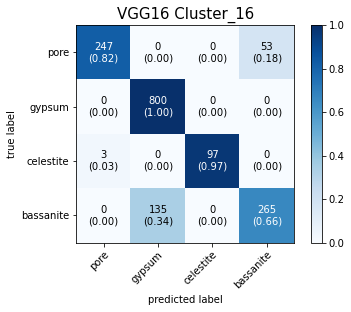

In [15]:
#cm_img = os.path.join(img_folder, '{}_{}_{}_vgg_full_201_cm.pdf'.format(seg_model, seg_nd, cluster_num))
cm  = confusion_matrix(gold_label, predicted_class_indices, labels=[1,2,3,4])
class_name = ['pore', 'gypsum', 'celestite', 'bassanite']
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar=True, show_absolute=True, show_normed=True, cmap=plt.cm.Blues, class_names=class_name)
# plt.xlabel('Predictions', fontsize=16)
# plt.ylabel('Actuals', fontsize=16)
plt.title('VGG16 Cluster_{}'.format(cluster_num), fontsize=15)
#plt.savefig(cm_img)
plt.show()

### Pixel intensity in labelled data (slice 471)

In [16]:
def get_dragonfly_grayscale(slice_num):
    current_path = os.getcwd()
    s = slice_num - 400 + 1
    s = str(s).zfill(3)
    dragonfly_bassanite = os.path.join(current_path, 'VA10_0050_Bassanite\VA10_0050_Bassanite{}.tiff'.format(s))
    dragonfly_celestite = os.path.join(current_path, 'VA10_0050_Celestite\VA10_0050_Celestite{}.tiff'.format(s))
    dragonfly_gypsum = os.path.join(current_path, 'VA10_0050_Gypsum\VA10_0050_Gypsum{}.tiff'.format(s))
    dragonfly_pore = os.path.join(current_path, 'VA10_0050_Pores\VA10_0050_Pores{}.tiff'.format(s))

    bassanite = cv2.imread(dragonfly_bassanite, cv2.IMREAD_GRAYSCALE) / 255
    celestite = cv2.imread(dragonfly_celestite, cv2.IMREAD_GRAYSCALE) / 255
    gypsum = cv2.imread(dragonfly_gypsum, cv2.IMREAD_GRAYSCALE) / 255
    pore = cv2.imread(dragonfly_pore, cv2.IMREAD_GRAYSCALE) / 255

    return bassanite, celestite, gypsum, pore

In [17]:
bas, cel, gyp, pore = get_dragonfly_grayscale(471)

In [64]:
# get the index of four phases
bas_idx = np.where(bas == 1)
cel_idx = np.where(cel == 1)
gyp_idx = np.where(gyp == 1)
pore_idx = np.where(pore == 1)

artefact = bas + cel + gyp + pore
artefact_idx = np.where(artefact == 0)

In [21]:
img471 = cv2.imread('cropped_0050\VA10_Pc200_Ram25_Pf50_T125_0050_0471.rec.8bit.tif', -1)

In [27]:
import module.features as features
import module.content as content

In [32]:
raw471_path = os.path.join(os.getcwd(),'VA10_Pc200_Ram25_Pf50_T125_0050\VA10_Pc200_Ram25_Pf50_T125_0050_0471.rec.8bit.tif')

In [33]:
keyword = 'VA10_Pc200_Ram25_Pf'
mask, feature_index = features.get_rec_mask_50(raw471_path, 3)
feature_4D, feature_3D = features.get_all_features_3(raw471_path, feature_index, keyword)

Pick one slice to get mask and features index
Current slice: d:\MSc-Project\VA10_Pc200_Ram25_Pf50_T125_0050\VA10_Pc200_Ram25_Pf50_T125_0050_0471.rec.8bit.tif
Loading 9 images...
Finished!
Getting features...
Finished!
Concatenating features...
Finished!


In [49]:
feature_4D.shape

(598500, 81)

In [53]:
reshape_4D = feature_4D.reshape(700, 855, 81)
reshape_3D = feature_3D.reshape(700, 855, 27)

In [58]:
reshape_3D[6][6]

array([116, 117, 116, 112, 116, 115, 100, 106, 114, 113, 118, 122, 113,
       117, 120, 106, 103, 101, 119, 122, 115, 112, 107, 103, 104, 107,
       101], dtype=uint8)

In [61]:
bas_3d = []
cel_3d = []
gyp_3d = []
pore_3d = []
artefact_3d = []

In [62]:
bas_4d = []
cel_4d = []
gyp_4d = []
pore_4d = []
artefact_4d = []

In [63]:
for i in range(len(bas_idx[0])):
    m = bas_idx[0][i]
    n = bas_idx[1][i]
    bas_3d.append(reshape_3D[m][n])
    bas_4d.append(reshape_4D[m][n])


In [65]:
for i in range(len(cel_idx[0])):
    m = cel_idx[0][i]
    n = cel_idx[1][i]
    cel_3d.append(reshape_3D[m][n])
    cel_4d.append(reshape_4D[m][n])

In [66]:
for i in range(len(gyp_idx[0])):
    m = gyp_idx[0][i]
    n = gyp_idx[1][i]
    gyp_3d.append(reshape_3D[m][n])
    gyp_4d.append(reshape_4D[m][n])

In [67]:
for i in range(len(pore_idx[0])):
    m = pore_idx[0][i]
    n = pore_idx[1][i]
    pore_3d.append(reshape_3D[m][n])
    pore_4d.append(reshape_4D[m][n])

In [68]:
for i in range(len(artefact_idx[0])):
    m = artefact_idx[0][i]
    n = artefact_idx[1][i]
    artefact_3d.append(reshape_3D[m][n])
    artefact_4d.append(reshape_4D[m][n])

In [71]:
bas_3d = np.array(bas_3d)
cel_3d = np.array(cel_3d)
gyp_3d = np.array(gyp_3d)
pore_3d = np.array(pore_3d)
artefact_3d = np.array(artefact_3d)

In [72]:
bas_4d = np.array(bas_4d)
cel_4d = np.array(cel_4d)
gyp_4d = np.array(gyp_4d)
pore_4d = np.array(pore_4d)
artefact_4d = np.array(artefact_4d)

In [87]:
bas_3d_mean = bas_3d.mean(axis=0)
cel_3d_mean = cel_3d.mean(axis=0)
gyp_3d_mean = gyp_3d.mean(axis=0)
pore_3d_mean = pore_3d.mean(axis=0)
artefact_3d_mean = artefact_3d.mean(axis=0)

In [88]:
bas_4d_mean = bas_4d.mean(axis=0)
cel_4d_mean = cel_4d.mean(axis=0)
gyp_4d_mean = gyp_4d.mean(axis=0)
pore_4d_mean = pore_4d.mean(axis=0)
artefact_4d_mean = artefact_4d.mean(axis=0)

In [89]:
artefact_3d_mean

array([115.09834326, 114.54247981, 113.22032899, 114.15352868,
       113.82825305, 112.81840693, 112.51176228, 112.4290431 ,
       112.06526738, 116.5058664 , 115.70780025, 113.58634514,
       115.16225458, 114.68881552, 113.11178586, 112.81086021,
       112.72118389, 112.11208066, 115.0748187 , 114.53829373,
       113.19474088, 114.16449502, 113.8191734 , 112.82618949,
       112.61700371, 112.47980662, 112.1381994 ])

In [90]:
def get_image(array):
	dim = int(np.sqrt(len(array)))
	convert = array.astype(np.uint16)
	img = convert.reshape((dim, dim))
	return img

def transfer_image(array):
	length = int(len(array))
	div_length = length // 3
	img_bot = get_image(array[:div_length])
	img_mid = get_image(array[div_length:2*div_length])
	img_top = get_image(array[2*div_length:])
	return img_bot, img_mid, img_top

In [104]:
from matplotlib.colors import NoNorm

In [ ]:
from matplotlib.colors import Normalize

### 3D

In [201]:
img_bot_pore_3D, img_mid_pore_3D, img_top_pore_3D = transfer_image(pore_3d_mean)

In [202]:
img_bot_pore_3D, img_mid_pore_3D, img_top_pore_3D

(array([[87, 88, 94],
        [89, 89, 94],
        [94, 94, 96]], dtype=uint16),
 array([[84, 86, 92],
        [87, 88, 92],
        [93, 93, 96]], dtype=uint16),
 array([[87, 89, 94],
        [91, 91, 95],
        [96, 96, 99]], dtype=uint16))

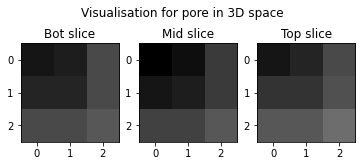

In [200]:

fig = plt.figure()
fig.suptitle('Visualisation for pore in 3D space', x=0.5, y=0.8)
ax = plt.subplot(131)
# ax.axis('off')
ax.set_title('Bot slice')
ax.imshow(img_bot_pore_3D,'gray',vmin=84, vmax=119)
ax = plt.subplot(132)
# ax.axis('off')
ax.set_title('Mid slice')
ax.imshow(img_mid_pore_3D,'gray',vmin=84, vmax=119)
ax = plt.subplot(133)
# ax.axis('off')
ax.set_title('Top slice')
ax.imshow(img_top_pore_3D,'gray',vmin=84, vmax=119)
fig.savefig('3D_pore.png', bbox_inches='tight', pad_inches=0.0)

In [203]:
img_bot_bas_3D, img_mid_bas_3D, img_top_bas_3D = transfer_image(bas_3d_mean)
img_bot_bas_3D, img_mid_bas_3D, img_top_bas_3D

(array([[118, 117, 115],
        [117, 117, 115],
        [115, 115, 114]], dtype=uint16),
 array([[119, 118, 116],
        [118, 118, 116],
        [115, 115, 114]], dtype=uint16),
 array([[118, 117, 115],
        [117, 116, 115],
        [114, 114, 113]], dtype=uint16))

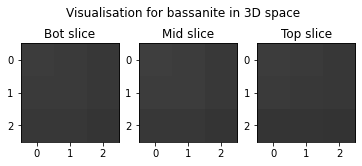

In [134]:

fig = plt.figure()
fig.suptitle('Visualisation for bassanite in 3D space', x=0.5, y=0.8)
ax = plt.subplot(131)
# ax.axis('off')
ax.set_title('Bot slice')
ax.imshow(img_bot_bas_3D,'gray',vmin=84, vmax=228)
ax = plt.subplot(132)
# ax.axis('off')
ax.set_title('Mid slice')
ax.imshow(img_mid_bas_3D,'gray',vmin=84, vmax=228)
ax = plt.subplot(133)
# ax.axis('off')
ax.set_title('Top slice')
ax.imshow(img_top_bas_3D,'gray',vmin=84, vmax=228)
fig.savefig('3D_bas.png', bbox_inches='tight', pad_inches=0.0)

In [205]:
img_bot_cel_3D, img_mid_cel_3D, img_top_cel_3D = transfer_image(cel_3d_mean)
img_bot_cel_3D, img_mid_cel_3D, img_top_cel_3D

(array([[224, 223, 219],
        [223, 223, 220],
        [221, 221, 218]], dtype=uint16),
 array([[226, 225, 221],
        [225, 224, 221],
        [223, 222, 220]], dtype=uint16),
 array([[228, 227, 223],
        [227, 226, 223],
        [224, 224, 221]], dtype=uint16))

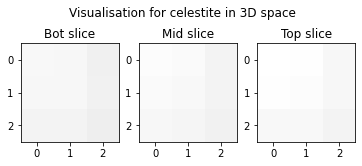

In [135]:
fig = plt.figure()
fig.suptitle('Visualisation for celestite in 3D space', x=0.5, y=0.8)
ax = plt.subplot(131)
# ax.axis('off')
ax.set_title('Bot slice')
ax.imshow(img_bot_cel_3D,'gray',vmin=84, vmax=228)
ax = plt.subplot(132)
# ax.axis('off')
ax.set_title('Mid slice')
ax.imshow(img_mid_cel_3D,'gray',vmin=84, vmax=228)
ax = plt.subplot(133)
# ax.axis('off')
ax.set_title('Top slice')
ax.imshow(img_top_cel_3D,'gray',vmin=84, vmax=228)
fig.savefig('3D_cel.png', bbox_inches='tight', pad_inches=0.0)

In [206]:
img_bot_gyp_3D, img_mid_gyp_3D, img_top_gyp_3D = transfer_image(gyp_3d_mean)
img_bot_gyp_3D, img_mid_gyp_3D, img_top_gyp_3D

(array([[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]], dtype=uint16),
 array([[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]], dtype=uint16),
 array([[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]], dtype=uint16))

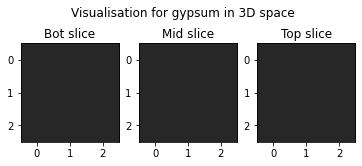

In [136]:
fig = plt.figure()
fig.suptitle('Visualisation for gypsum in 3D space', x=0.5, y=0.8)
ax = plt.subplot(131)
# ax.axis('off')
ax.set_title('Bot slice')
ax.imshow(img_bot_gyp_3D,'gray',vmin=84, vmax=228)
ax = plt.subplot(132)
# ax.axis('off')
ax.set_title('Mid slice')
ax.imshow(img_mid_gyp_3D,'gray',vmin=84, vmax=228)
ax = plt.subplot(133)
# ax.axis('off')
ax.set_title('Top slice')
ax.imshow(img_top_gyp_3D,'gray',vmin=84, vmax=228)
fig.savefig('3D_gyp.png', bbox_inches='tight', pad_inches=0.0)

In [207]:
img_bot_artefact_3D, img_mid_artefact_3D, img_top_artefact_3D = transfer_image(artefact_3d_mean)
img_bot_artefact_3D, img_mid_artefact_3D, img_top_artefact_3D

(array([[115, 114, 113],
        [114, 113, 112],
        [112, 112, 112]], dtype=uint16),
 array([[116, 115, 113],
        [115, 114, 113],
        [112, 112, 112]], dtype=uint16),
 array([[115, 114, 113],
        [114, 113, 112],
        [112, 112, 112]], dtype=uint16))

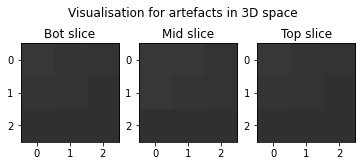

In [137]:
fig = plt.figure()
fig.suptitle('Visualisation for artefacts in 3D space', x=0.5, y=0.8)
ax = plt.subplot(131)
# ax.axis('off')
ax.set_title('Bot slice')
ax.imshow(img_bot_artefact_3D,'gray',vmin=84, vmax=228)
ax = plt.subplot(132)
# ax.axis('off')
ax.set_title('Mid slice')
ax.imshow(img_mid_artefact_3D,'gray',vmin=84, vmax=228)
ax = plt.subplot(133)
# ax.axis('off')
ax.set_title('Top slice')
ax.imshow(img_top_artefact_3D,'gray',vmin=84, vmax=228)
fig.savefig('3D_artefact.png', bbox_inches='tight', pad_inches=0.0)

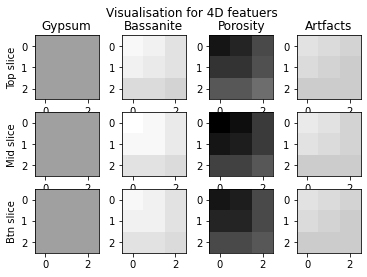

In [209]:
fig = plt.figure()
fig.suptitle('Visualisation for 4D featuers')
ax = plt.subplot2grid((3,4), (0,0))
ax.set_ylabel('Top slice')
ax.set_title('Gypsum')
ax.imshow(img_top_gyp_3D,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((3,4), (0,1))
ax.set_title('Bassanite')
ax.imshow(img_top_bas_3D,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((3,4), (0,2))
ax.set_title('Porosity')
ax.imshow(img_top_pore_3D,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((3,4), (0,3))
ax.set_title('Artfacts')
ax.imshow(img_top_artefact_3D,'gray',vmin=84, vmax=119)



ax = plt.subplot2grid((3,4), (1,0))
ax.set_ylabel('Mid slice')
ax.imshow(img_mid_gyp_3D,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((3,4), (1,1))
ax.imshow(img_mid_bas_3D,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((3,4), (1,2))
ax.imshow(img_mid_pore_3D,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((3,4), (1,3))
ax.imshow(img_mid_artefact_3D,'gray',vmin=84, vmax=119)



ax = plt.subplot2grid((3,4), (2,0))
ax.set_ylabel('Btn slice')
ax.imshow(img_bot_gyp_3D,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((3,4), (2,1))
ax.imshow(img_bot_bas_3D,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((3,4), (2,2))
ax.imshow(img_bot_pore_3D,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((3,4), (2,3))
ax.imshow(img_bot_artefact_3D,'gray',vmin=84, vmax=119)



fig.savefig('3D_features.png', bbox_inches='tight', pad_inches=0.0)

#### 4D

##### pore

In [210]:
img_bot_pore_4D_t0, img_mid_pore_4D_t0, img_top_pore_4D_t0 = transfer_image(pore_4d_mean[:27])
img_bot_pore_4D_t0, img_mid_pore_4D_t0, img_top_pore_4D_t0

(array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16),
 array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16),
 array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16))

In [211]:
img_bot_pore_4D_t1, img_mid_pore_4D_t1, img_top_pore_4D_t1 = transfer_image(pore_4d_mean[27:54])
img_bot_pore_4D_t1, img_mid_pore_4D_t1, img_top_pore_4D_t1

(array([[87, 88, 94],
        [89, 89, 94],
        [94, 94, 96]], dtype=uint16),
 array([[84, 86, 92],
        [87, 88, 92],
        [93, 93, 96]], dtype=uint16),
 array([[87, 89, 94],
        [91, 91, 95],
        [96, 96, 99]], dtype=uint16))

In [212]:
img_bot_pore_4D_t2, img_mid_pore_4D_t2, img_top_pore_4D_t2 = transfer_image(pore_4d_mean[54:])
img_bot_pore_4D_t2, img_mid_pore_4D_t2, img_top_pore_4D_t2

(array([[108, 108, 108],
        [108, 108, 108],
        [107, 108, 108]], dtype=uint16),
 array([[108, 108, 108],
        [107, 108, 108],
        [107, 107, 108]], dtype=uint16),
 array([[108, 108, 108],
        [107, 107, 108],
        [107, 107, 108]], dtype=uint16))

In [213]:
pore_4D_t1 = np.array([img_bot_pore_4D_t1, img_mid_pore_4D_t1, img_top_pore_4D_t1])
pore_4D_t1_mean = pore_4D_t1.mean(axis=0)
pore_4D_t1_mean

array([[86.        , 87.66666667, 93.33333333],
       [89.        , 89.33333333, 93.66666667],
       [94.33333333, 94.33333333, 97.        ]])

In [214]:
pore_4D_t0 = np.array([img_bot_pore_4D_t0, img_mid_pore_4D_t0, img_top_pore_4D_t0])
pore_4D_t0_mean = pore_4D_t0.mean(axis=0)
pore_4D_t0_mean

array([[107., 107., 107.],
       [107., 107., 107.],
       [107., 107., 107.]])

In [215]:
pore_4D_t2 = np.array([img_bot_pore_4D_t2, img_mid_pore_4D_t2, img_top_pore_4D_t2])
pore_4D_t2_mean = pore_4D_t2.mean(axis=0)
pore_4D_t2_mean

array([[108.        , 108.        , 108.        ],
       [107.33333333, 107.66666667, 108.        ],
       [107.        , 107.33333333, 108.        ]])

##### bassanite

In [216]:
img_bot_bas_4D_t0, img_mid_bas_4D_t0, img_top_bas_4D_t0 = transfer_image(bas_4d_mean[:27])
img_bot_bas_4D_t0, img_mid_bas_4D_t0, img_top_bas_4D_t0

(array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16),
 array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16),
 array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16))

In [217]:
img_bot_bas_4D_t1, img_mid_bas_4D_t1, img_top_bas_4D_t1 = transfer_image(bas_4d_mean[27:54])
img_bot_bas_4D_t1, img_mid_bas_4D_t1, img_top_bas_4D_t1

(array([[118, 117, 115],
        [117, 117, 115],
        [115, 115, 114]], dtype=uint16),
 array([[119, 118, 116],
        [118, 118, 116],
        [115, 115, 114]], dtype=uint16),
 array([[118, 117, 115],
        [117, 116, 115],
        [114, 114, 113]], dtype=uint16))

In [218]:
img_bot_bas_4D_t2, img_mid_bas_4D_t2, img_top_bas_4D_t2 = transfer_image(bas_4d_mean[54:])
img_bot_bas_4D_t2, img_mid_bas_4D_t2, img_top_bas_4D_t2

(array([[109, 109, 108],
        [108, 108, 108],
        [108, 108, 108]], dtype=uint16),
 array([[109, 108, 108],
        [108, 108, 108],
        [108, 108, 108]], dtype=uint16),
 array([[108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]], dtype=uint16))

In [219]:
bas_4D_t0 = np.array([img_bot_bas_4D_t0, img_mid_bas_4D_t0, img_top_bas_4D_t0])
bas_4D_t0_mean = bas_4D_t0.mean(axis=0)
bas_4D_t0_mean

array([[107., 107., 107.],
       [107., 107., 107.],
       [107., 107., 107.]])

In [220]:
bas_4D_t1 = np.array([img_bot_bas_4D_t1, img_mid_bas_4D_t1, img_top_bas_4D_t1])
bas_4D_t1_mean = bas_4D_t1.mean(axis=0)
bas_4D_t1_mean

array([[118.33333333, 117.33333333, 115.33333333],
       [117.33333333, 117.        , 115.33333333],
       [114.66666667, 114.66666667, 113.66666667]])

In [221]:

bas_4D_t2 = np.array([img_bot_bas_4D_t2, img_mid_bas_4D_t2, img_top_bas_4D_t2])
bas_4D_t2_mean = bas_4D_t2.mean(axis=0)
bas_4D_t2_mean

array([[108.66666667, 108.33333333, 108.        ],
       [108.        , 108.        , 108.        ],
       [108.        , 108.        , 108.        ]])

#### celestite

In [222]:
img_bot_cel_4D_t0, img_mid_cel_4D_t0, img_top_cel_4D_t0 = transfer_image(cel_4d_mean[:27])
img_bot_cel_4D_t0, img_mid_cel_4D_t0, img_top_cel_4D_t0

(array([[192, 196, 200],
        [191, 195, 199],
        [190, 194, 197]], dtype=uint16),
 array([[194, 198, 202],
        [193, 197, 200],
        [192, 195, 199]], dtype=uint16),
 array([[197, 200, 204],
        [195, 199, 202],
        [194, 198, 201]], dtype=uint16))

In [223]:
img_bot_cel_4D_t1, img_mid_cel_4D_t1, img_top_cel_4D_t1 = transfer_image(cel_4d_mean[27:54])
img_bot_cel_4D_t1, img_mid_cel_4D_t1, img_top_cel_4D_t1

(array([[224, 223, 219],
        [223, 223, 220],
        [221, 221, 218]], dtype=uint16),
 array([[226, 225, 221],
        [225, 224, 221],
        [223, 222, 220]], dtype=uint16),
 array([[228, 227, 223],
        [227, 226, 223],
        [224, 224, 221]], dtype=uint16))

In [224]:
img_bot_cel_4D_t2, img_mid_cel_4D_t2, img_top_cel_4D_t2 = transfer_image(cel_4d_mean[54:])
img_bot_cel_4D_t2, img_mid_cel_4D_t2, img_top_cel_4D_t2

(array([[182, 179, 177],
        [181, 178, 175],
        [180, 177, 174]], dtype=uint16),
 array([[183, 180, 177],
        [181, 178, 176],
        [180, 177, 174]], dtype=uint16),
 array([[183, 180, 177],
        [181, 179, 176],
        [180, 177, 174]], dtype=uint16))

In [225]:
cel_4D_t0 = np.array([img_bot_cel_4D_t0, img_mid_cel_4D_t0, img_top_cel_4D_t0])
cel_4D_t0_mean = cel_4D_t0.mean(axis=0)
cel_4D_t0_mean

array([[194.33333333, 198.        , 202.        ],
       [193.        , 197.        , 200.33333333],
       [192.        , 195.66666667, 199.        ]])

In [226]:

cel_4D_t1 = np.array([img_bot_cel_4D_t1, img_mid_cel_4D_t1, img_top_cel_4D_t1])
cel_4D_t1_mean = cel_4D_t1.mean(axis=0)
cel_4D_t1_mean

array([[226.        , 225.        , 221.        ],
       [225.        , 224.33333333, 221.33333333],
       [222.66666667, 222.33333333, 219.66666667]])

In [227]:

cel_4D_t2 = np.array([img_bot_cel_4D_t2, img_mid_cel_4D_t2, img_top_cel_4D_t2])
cel_4D_t2_mean = cel_4D_t2.mean(axis=0)
cel_4D_t2_mean

array([[182.66666667, 179.66666667, 177.        ],
       [181.        , 178.33333333, 175.66666667],
       [180.        , 177.        , 174.        ]])

#### gypsum

In [228]:
img_bot_gyp_4D_t0, img_mid_gyp_4D_t0, img_top_gyp_4D_t0 = transfer_image(gyp_4d_mean[:27])
img_bot_gyp_4D_t0, img_mid_gyp_4D_t0, img_top_gyp_4D_t0

(array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16),
 array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16),
 array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16))

In [229]:
img_bot_gyp_4D_t1, img_mid_gyp_4D_t1, img_top_gyp_4D_t1 = transfer_image(gyp_4d_mean[27:54])
img_bot_gyp_4D_t1, img_mid_gyp_4D_t1, img_top_gyp_4D_t1

(array([[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]], dtype=uint16),
 array([[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]], dtype=uint16),
 array([[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]], dtype=uint16))

In [230]:
img_bot_gyp_4D_t2, img_mid_gyp_4D_t2, img_top_gyp_4D_t2 = transfer_image(gyp_4d_mean[54:])
img_bot_gyp_4D_t2, img_mid_gyp_4D_t2, img_top_gyp_4D_t2

(array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16),
 array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16),
 array([[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]], dtype=uint16))

In [231]:
gyp_4D_t0 = np.array([img_bot_gyp_4D_t0, img_mid_gyp_4D_t0, img_top_gyp_4D_t0])
gyp_4D_t0_mean = gyp_4D_t0.mean(axis=0)
gyp_4D_t0_mean

array([[107., 107., 107.],
       [107., 107., 107.],
       [107., 107., 107.]])

In [232]:
gyp_4D_t1 = np.array([img_bot_gyp_4D_t1, img_mid_gyp_4D_t1, img_top_gyp_4D_t1])
gyp_4D_t1_mean = gyp_4D_t1.mean(axis=0)
gyp_4D_t1_mean

array([[106., 106., 106.],
       [106., 106., 106.],
       [106., 106., 106.]])

In [233]:
gyp_4D_t2 = np.array([img_bot_gyp_4D_t2, img_mid_gyp_4D_t2, img_top_gyp_4D_t2])
gyp_4D_t2_mean = gyp_4D_t2.mean(axis=0)
gyp_4D_t2_mean

array([[107., 107., 107.],
       [107., 107., 107.],
       [107., 107., 107.]])

#### artefact

In [234]:
img_bot_artefact_4D_t0, img_mid_artefact_4D_t0, img_top_artefact_4D_t0 = transfer_image(artefact_4d_mean[:27])
img_bot_artefact_4D_t0, img_mid_artefact_4D_t0, img_top_artefact_4D_t0

(array([[114, 114, 113],
        [114, 114, 113],
        [114, 114, 113]], dtype=uint16),
 array([[114, 114, 113],
        [114, 114, 113],
        [114, 114, 113]], dtype=uint16),
 array([[114, 114, 113],
        [114, 114, 114],
        [114, 114, 114]], dtype=uint16))

In [235]:
img_bot_artefact_4D_t1, img_mid_artefact_4D_t1, img_top_artefact_4D_t1 = transfer_image(artefact_4d_mean[27:54])
img_bot_artefact_4D_t1, img_mid_artefact_4D_t1, img_top_artefact_4D_t1

(array([[115, 114, 113],
        [114, 113, 112],
        [112, 112, 112]], dtype=uint16),
 array([[116, 115, 113],
        [115, 114, 113],
        [112, 112, 112]], dtype=uint16),
 array([[115, 114, 113],
        [114, 113, 112],
        [112, 112, 112]], dtype=uint16))

In [236]:
img_bot_artefact_4D_t2, img_mid_artefact_4D_t2, img_top_artefact_4D_t2 = transfer_image(artefact_4d_mean[54:])
img_bot_artefact_4D_t2, img_mid_artefact_4D_t2, img_top_artefact_4D_t2

(array([[115, 116, 116],
        [115, 116, 116],
        [115, 116, 116]], dtype=uint16),
 array([[116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]], dtype=uint16),
 array([[116, 116, 117],
        [116, 116, 117],
        [116, 116, 117]], dtype=uint16))

In [237]:
artefact_4D_t0 = np.array([img_bot_artefact_4D_t0, img_mid_artefact_4D_t0, img_top_artefact_4D_t0])
artefact_4D_t0_mean = artefact_4D_t0.mean(axis=0)
artefact_4D_t0_mean

array([[114.        , 114.        , 113.        ],
       [114.        , 114.        , 113.33333333],
       [114.        , 114.        , 113.33333333]])

In [238]:
artefact_4D_t1 = np.array([img_bot_artefact_4D_t1, img_mid_artefact_4D_t1, img_top_artefact_4D_t1])
artefact_4D_t1_mean = artefact_4D_t1.mean(axis=0)
artefact_4D_t1_mean

array([[115.33333333, 114.33333333, 113.        ],
       [114.33333333, 113.33333333, 112.33333333],
       [112.        , 112.        , 112.        ]])

In [239]:
artefact_4D_t2 = np.array([img_bot_artefact_4D_t2, img_mid_artefact_4D_t2, img_top_artefact_4D_t2])
artefact_4D_t2_mean = artefact_4D_t2.mean(axis=0)
artefact_4D_t2_mean

array([[115.66666667, 116.        , 116.33333333],
       [115.66666667, 116.        , 116.33333333],
       [115.66666667, 116.        , 116.33333333]])

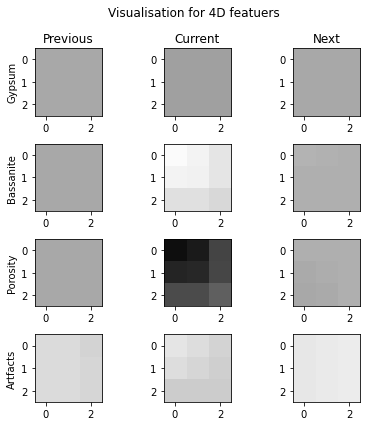

In [243]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Visualisation for 4D featuers')
ax = plt.subplot2grid((4,3), (0,0))
ax.set_title('Previous')
ax.set_ylabel('Gypsum')
ax.imshow(gyp_4D_t0_mean,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((4,3), (0,1))
ax.set_title('Current')
ax.imshow(gyp_4D_t1_mean,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((4,3), (0,2))
ax.set_title('Next')
ax.imshow(gyp_4D_t2_mean,'gray',vmin=84, vmax=119)



ax = plt.subplot2grid((4,3), (1,0))
ax.set_ylabel('Bassanite')
ax.imshow(bas_4D_t0_mean,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((4,3), (1,1))
ax.imshow(bas_4D_t1_mean,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((4,3), (1,2))
ax.imshow(bas_4D_t2_mean,'gray',vmin=84, vmax=119)



ax = plt.subplot2grid((4,3), (2,0))
ax.set_ylabel('Porosity')
ax.imshow(pore_4D_t0_mean,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((4,3), (2,1))
ax.imshow(pore_4D_t1_mean,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((4,3), (2,2))
ax.imshow(pore_4D_t2_mean,'gray',vmin=84, vmax=119)



ax = plt.subplot2grid((4,3), (3,0))
ax.set_ylabel('Artfacts')
ax.imshow(artefact_4D_t0_mean,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((4,3), (3,1))
ax.imshow(artefact_4D_t1_mean,'gray',vmin=84, vmax=119)

ax = plt.subplot2grid((4,3), (3,2))
ax.imshow(artefact_4D_t2_mean,'gray',vmin=84, vmax=119)


plt.subplots_adjust(wspace = 0.01)
fig.tight_layout()

fig.savefig('4D_features.png', bbox_inches='tight', pad_inches=0.0)

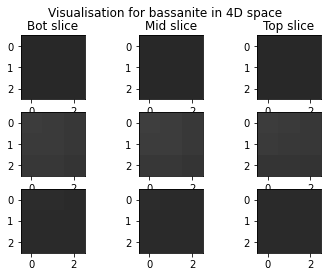

In [157]:
fig = plt.figure()
fig.suptitle('Visualisation for bassanite in 4D space')
ax = plt.subplot(331)
# ax.axis('off')
ax.set_title('Bot slice')
ax.imshow(img_bot_bas_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(332)
# ax.axis('off')
ax.set_title('Mid slice')
ax.imshow(img_mid_bas_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(333)
# ax.axis('off')
ax.set_title('Top slice')
ax.imshow(img_top_bas_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(334)
# ax.axis('off')
ax.imshow(img_bot_bas_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(335)
# ax.axis('off')
ax.imshow(img_mid_bas_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(336)
# ax.axis('off')
ax.imshow(img_top_bas_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(337)
# ax.axis('off')
ax.imshow(img_bot_bas_4D_t2,'gray',vmin=84, vmax=228)
ax = plt.subplot(338)
# ax.axis('off')
ax.imshow(img_mid_bas_4D_t2,'gray',vmin=84, vmax=228)
ax = plt.subplot(339)
# ax.axis('off')
ax.imshow(img_top_bas_4D_t2,'gray',vmin=84, vmax=228)
fig.savefig('4D_bas.png', bbox_inches='tight', pad_inches=0.0)

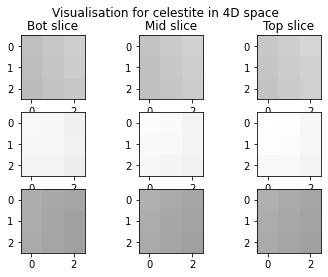

In [158]:
fig = plt.figure()
fig.suptitle('Visualisation for celestite in 4D space')
ax = plt.subplot(331)
# ax.axis('off')
ax.set_title('Bot slice')
ax.imshow(img_bot_cel_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(332)
# ax.axis('off')
ax.set_title('Mid slice')
ax.imshow(img_mid_cel_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(333)
# ax.axis('off')
ax.set_title('Top slice')
ax.imshow(img_top_cel_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(334)
# ax.axis('off')
ax.imshow(img_bot_cel_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(335)
# ax.axis('off')
ax.imshow(img_mid_cel_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(336)
# ax.axis('off')
ax.imshow(img_top_cel_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(337)
# ax.axis('off')
ax.imshow(img_bot_cel_4D_t2,'gray',vmin=84, vmax=228)
ax = plt.subplot(338)
# ax.axis('off')
ax.imshow(img_mid_cel_4D_t2,'gray',vmin=84, vmax=228)
ax = plt.subplot(339)
# ax.axis('off')
ax.imshow(img_top_cel_4D_t2,'gray',vmin=84, vmax=228)
fig.savefig('4D_cel.png', bbox_inches='tight', pad_inches=0.0)

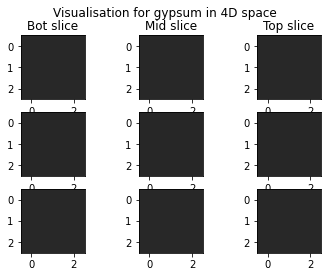

In [159]:
fig = plt.figure()
fig.suptitle('Visualisation for gypsum in 4D space')
ax = plt.subplot(331)
# ax.axis('off')
ax.set_title('Bot slice')
ax.imshow(img_bot_gyp_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(332)
# ax.axis('off')
ax.set_title('Mid slice')
ax.imshow(img_mid_gyp_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(333)
# ax.axis('off')
ax.set_title('Top slice')
ax.imshow(img_top_gyp_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(334)
# ax.axis('off')
ax.imshow(img_bot_gyp_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(335)
# ax.axis('off')
ax.imshow(img_mid_gyp_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(336)
# ax.axis('off')
ax.imshow(img_top_gyp_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(337)
# ax.axis('off')
ax.imshow(img_bot_gyp_4D_t2,'gray',vmin=84, vmax=228)
ax = plt.subplot(338)
# ax.axis('off')
ax.imshow(img_mid_gyp_4D_t2,'gray',vmin=84, vmax=228)
ax = plt.subplot(339)
# ax.axis('off')
ax.imshow(img_top_gyp_4D_t2,'gray',vmin=84, vmax=228)
fig.savefig('4D_gyp.png', bbox_inches='tight', pad_inches=0.0)

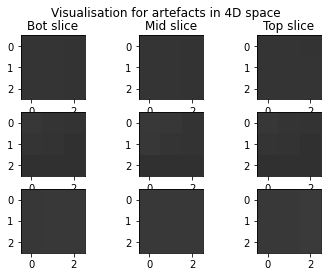

In [160]:
fig = plt.figure()
fig.suptitle('Visualisation for artefacts in 4D space')
ax = plt.subplot(331)
# ax.axis('off')
ax.set_title('Bot slice')
ax.imshow(img_bot_artefact_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(332)
# ax.axis('off')
ax.set_title('Mid slice')
ax.imshow(img_mid_artefact_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(333)
# ax.axis('off')
ax.set_title('Top slice')
ax.imshow(img_top_artefact_4D_t0,'gray',vmin=84, vmax=228)
ax = plt.subplot(334)
# ax.axis('off')
ax.imshow(img_bot_artefact_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(335)
# ax.axis('off')
ax.imshow(img_mid_artefact_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(336)
# ax.axis('off')
ax.imshow(img_top_artefact_4D_t1,'gray',vmin=84, vmax=228)
ax = plt.subplot(337)
# ax.axis('off')
ax.imshow(img_bot_artefact_4D_t2,'gray',vmin=84, vmax=228)
ax = plt.subplot(338)
# ax.axis('off')
ax.imshow(img_mid_artefact_4D_t2,'gray',vmin=84, vmax=228)
ax = plt.subplot(339)
# ax.axis('off')
ax.imshow(img_top_artefact_4D_t2,'gray',vmin=84, vmax=228)
fig.savefig('4D_artefact.png', bbox_inches='tight', pad_inches=0.0)